In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/Users/marcolam/git/rascal/rascal/calibrator.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
spectrum = np.loadtxt("data_msp1000/A620EBA HgCal.mspec", delimiter=',')[:,1]

In [3]:
peaks, _ = find_peaks(spectrum, prominence=300, distance=15, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=5)

INFO:rascal.calibrator:num_pix is set to 3648.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.


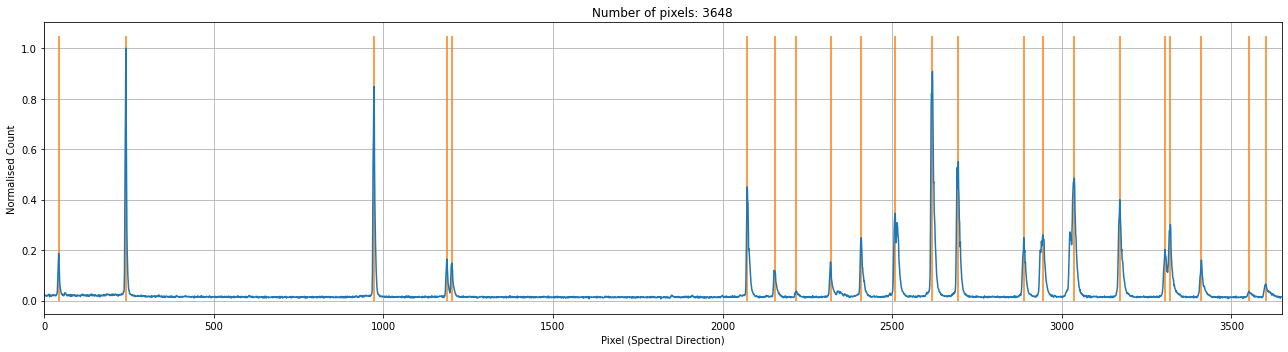

In [4]:
c = Calibrator(peaks_refined, spectrum)

c.set_calibrator_properties(num_pix=len(spectrum),
                            plotting_library='matplotlib',
                            log_level='info') 

c.plot_arc()

In [5]:
c.set_hough_properties(num_slopes=5000,
                       xbins=500,
                       ybins=500,
                       min_wavelength=4000.,
                       max_wavelength=8750.,
                       range_tolerance=500.,
                       linearity_tolerance=50)
c.add_atlas(["Hg"])
c.add_atlas(["Ar"],
            min_atlas_wavelength=6500)

c.set_ransac_properties(sample_size=5,
                        top_n_candidate=5,
                        linear=True,
                        filter_close=True,
                        ransac_thresh=5,
                        candidate_weighted=True,
                        hough_weight=1.0)
c.do_hough_transform()

INFO:rascal.calibrator:Peak at: 3842.8469746654573 A
INFO:rascal.calibrator:Peak at: 4077.8145428291155 A
INFO:rascal.calibrator:- matched to 4077.815185546875 A
INFO:rascal.calibrator:Peak at: 5102.659463611448 A
INFO:rascal.calibrator:- matched to 5102.6591796875 A
INFO:rascal.calibrator:Peak at: 5427.725679323627 A
INFO:rascal.calibrator:Peak at: 5450.050213788194 A
INFO:rascal.calibrator:Peak at: 6756.720851873499 A
INFO:rascal.calibrator:- matched to 6752.755859375 A
INFO:rascal.calibrator:Peak at: 6872.277917018409 A
INFO:rascal.calibrator:- matched to 6871.20849609375 A
INFO:rascal.calibrator:Peak at: 6962.926310314069 A
INFO:rascal.calibrator:- matched to 6965.3486328125 A
INFO:rascal.calibrator:Peak at: 7105.822315340874 A
INFO:rascal.calibrator:- matched to 7107.392578125 A
INFO:rascal.calibrator:Peak at: 7231.646085278548 A
INFO:rascal.calibrator:Peak at: 7369.074665362703 A
INFO:rascal.calibrator:- matched to 7371.37939453125 A
INFO:rascal.calibrator:Peak at: 7516.862431280

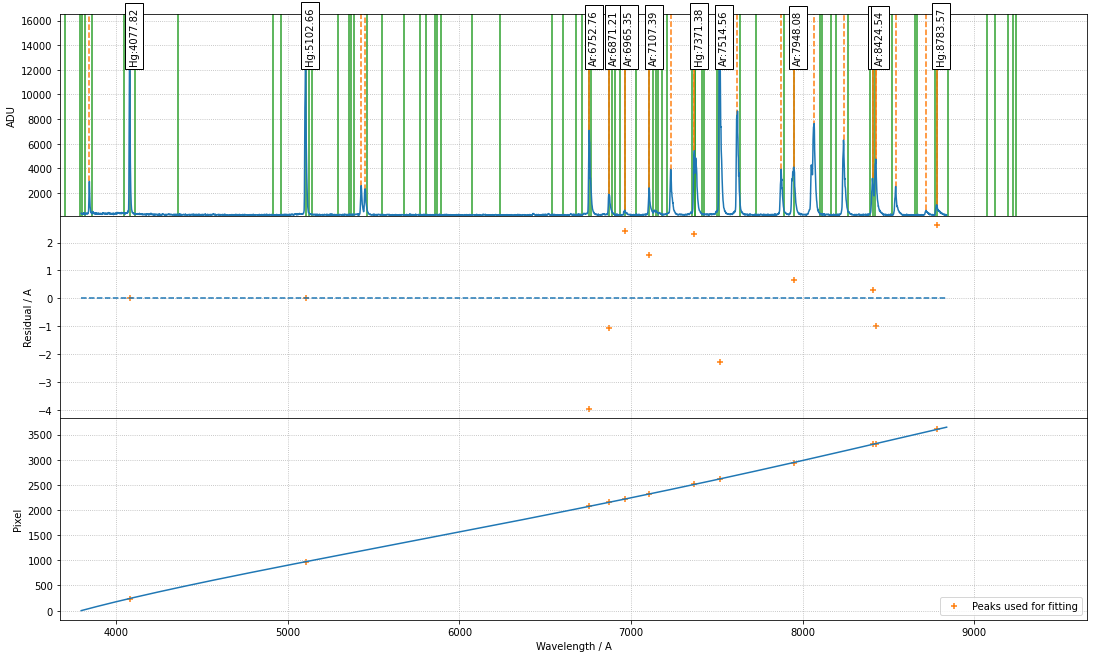

Stdev error: 0.9249578382719654 A
Peaks utilisation rate: 77.27272727272727%


In [6]:
best_p, rms, residual, peak_utilisation = c.fit(max_tries=1000)

c.plot_fit(best_p, plot_atlas=True, log_spectrum=False, tolerance=10.)

rms = np.sqrt(np.sum(residual**2 / len(residual)))

print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

NB: The peak at 8718.34 is almost certainly the N=1 image of 4358 (Hg)

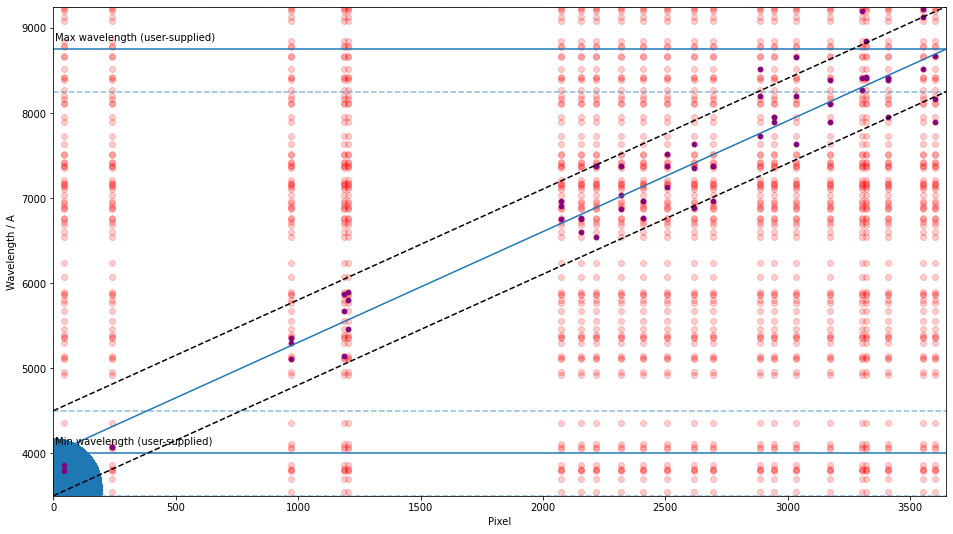

In [7]:
c.plot_search_space()